<a href="https://colab.research.google.com/github/davidofitaly/notes_02_50_key_stats_ds/blob/main/02_chapter/01_statistical_analysis_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Random Sampling and Sample Bias](#1)
3. [Selection Bias](#2)
4. [Sampling Distribution for Statistics](#3)
5. [Bootstrap Sampling](#4)
6. [Confidence Intervals](#5)
7. [Normal Distribution](#6)
8. [Long-Tailed Distributions](#7)
9. [t-Distribution (Student's t-distribution)](#8)
10. [Binomial Distribution](#9)
11. [Chi-Square Distribution](#10)
12. [F-Statistic](#11)
13. [Poisson Distribution](#12)
14. [Exponential Distribution](#13)
15. [Weibull Distribution](#14)


###<a name='0'></a>Import of libraries

In [1]:
# Load the libraries into the R session
library(boot)

###<a name='1'></a>Random Sampling and Sample Bias

##### **1. Sample**
#####A **sample** is a subset of units selected from the population for analysis. The goal is for the sample to be representative of the population, enabling valid inferences.

##### **2. Population**
#####The **population** refers to the entire set of individuals, items, or observations that are the subject of a study. It is the broader group from which the sample is drawn.

##### **3. Population Size ($N$) and Sample Size ($n$)**
- $N$: The total number of units in the population.  
- $n$: The total number of units in the sample.

##### **4. Random Sampling**
#####**Random sampling** ensures that every unit in the population has an equal chance of being included in the sample. This method minimizes bias and enhances the representativeness of the sample.

#####Key features of random sampling:
- Equal probability of selection for all units.
- Reduces the risk of systematic bias.
- Results can be generalized to the population.

##### **5. Stratified Sampling**
#####**Stratified sampling** involves dividing the population into subgroups (strata) based on specific characteristics, then randomly sampling from each stratum. It ensures representation across key subgroups.

##### **6. Strata**
#####A **stratum** (plural: strata) is a subgroup of the population that shares a common characteristic, such as age, income level, or geographical region. Stratification improves the precision of sample estimates.

##### **7. Random Sampling Within Strata**
#####In **stratified sampling**, random samples are drawn from each stratum. This can be proportional to the stratum’s size in the population or equal across strata, depending on the research objective.

##### **8. Bias**
#####**Bias** refers to a systematic error that causes the sample to misrepresent the population. Common sources of bias include:
- Non-random sampling methods.
- Exclusion of specific groups.
- Inconsistent data collection techniques.

##### **9. Sample Bias**
#####**Sample bias** occurs when the sample is not representative of the population, leading to distorted results. Examples include:
- **Selection bias**: Overrepresentation or underrepresentation of certain groups.
- **Non-response bias**: Results skewed due to a lack of participation from certain individuals.

###<a name='2'></a>Selection Bias

#####Selection bias occurs when the sample data used in an analysis is not representative of the target population, leading to skewed or incorrect conclusions. This bias can arise from the way data is collected, the choice of sample, or the conditions under which the sample is observed.

##### Important Concepts:

1. **Selection Bias:**
   - This is the distortion of a statistical analysis resulting from the method of selecting participants or data. It leads to non-random selection of data points, causing the sample to differ from the general population.


2. **Data Hunting:**
   - Data hunting refers to an exploratory approach where a researcher searches for patterns or insights within a dataset, often leading to overfitting or misinterpretation of findings.
   - This can be problematic if it leads to confirmation bias, where the researcher finds patterns that support preconceived notions rather than unbiased data.

3. **The Effect of Search Through Multiple Hypotheses:**
   - This effect occurs when a researcher tests multiple hypotheses or multiple models on the same dataset. The more hypotheses tested, the higher the likelihood of finding a spurious relationship, simply by chance.
   - Example: Testing 10 different hypotheses increases the likelihood that at least one will appear statistically significant due to random variation, even if there is no true effect.

4. **Regression to the Mean:**
   - This phenomenon occurs when extreme values tend to be closer to the average on subsequent measurements. It occurs because random variation causes extreme outcomes, which are less likely to persist over time.
   - Example: If an unusually high-performing student has a very high score on a test, their score on the next test is likely to be closer to the average, as the first result was influenced by random factors.


###<a name='3'></a>Sampling Distribution for Statistics

#####The sampling distribution is a probability distribution of a given statistic (such as the mean or variance) based on repeated sampling from a population. Understanding the sampling distribution is key to making inferences about the population from sample data.

##### Important Concepts:

1. **Statistic for the Sample:**
   - A statistic is a numerical value calculated from a sample of data. Common statistics include the sample mean, sample variance, and sample proportion.
   - Example: If you take a sample of 50 students' test scores and calculate the average, this average is a statistic for the sample.

2. **Data Distribution:**
   - The data distribution describes how the values of a dataset are spread or dispersed. It includes features like the central tendency, dispersion, and shape of the data.
   - Example: A normal distribution has a bell-shaped curve, with most of the data points clustered around the mean.

3. **Sampling Distribution:**
   - The sampling distribution refers to the distribution of a statistic (such as the sample mean) that is obtained through repeated sampling from a population.
   - When we take many random samples from a population and compute a statistic for each sample, the distribution of these statistics is known as the sampling distribution.
   - Example: If we repeatedly take samples of 30 students' test scores and calculate the mean for each sample, the distribution of these means is the sampling distribution.

4. **Central Limit Theorem:**
   - The Central Limit Theorem (CLT) states that for sufficiently large sample sizes, the sampling distribution of the sample mean will be approximately normal, regardless of the population distribution, as long as the population has finite variance.
   - This is a powerful result because it allows us to apply inferential statistics (such as confidence intervals and hypothesis tests) even if the underlying population distribution is not normal.
   - Example: If you sample 30 students from a population of students and calculate their mean scores, the distribution of these means will be approximately normal even if the individual scores are not normally distributed.

5. **Standard Error:**
   - The standard error is the standard deviation of the sampling distribution of a statistic, typically the sample mean. It measures how much the sample statistic is expected to vary from the true population parameter.
   - The formula for the standard error of the sample mean is:

$$ SE = \frac{\sigma}{\sqrt{n}} $$  

   - where $ \sigma $ is the population standard deviation and $n$ is the sample size.
   - Example: A larger sample size leads to a smaller standard error, meaning that the sample mean is likely to be closer to the population mean.



###<a name='4'></a>Bootstrap Sampling


#####Bootstrap sampling is a statistical method used to estimate the sampling distribution of a statistic by resampling with replacement from the observed data. This technique is particularly useful when the theoretical distribution of a statistic is complex or unknown.

##### Key Concepts:

1. **Bootstrap Sample:**
   - A bootstrap sample is a randomly selected subset of data obtained by sampling with replacement from the original dataset.
   - Each bootstrap sample has the same size as the original dataset, but some observations may appear more than once, while others may not appear at all.
   - Example: If your original dataset has 5 observations $\{x_1, x_2, x_3, x_4, x_5\}$, a bootstrap sample might look like $\{x_1, x_2, x_2, x_4, x_5\}$

2. **Resampling:**
   - Resampling refers to the process of repeatedly drawing samples from a dataset to compute a statistic multiple times.
   - Bootstrap resampling allows for estimating the variability of a statistic, constructing confidence intervals, or performing hypothesis testing without relying on strong parametric assumptions.
   - Example: Generate 1000 bootstrap samples from a dataset to calculate the sampling distribution of the mean.

##### Steps for Bootstrap Sampling:

1. Start with an original dataset of size $n$.
2. Randomly draw $n$ observations from the dataset with replacement to create a bootstrap sample.
3. Compute the statistic of interest (e.g., mean, median) for the bootstrap sample.
4. Repeat steps 2 and 3 many times (e.g., 1000 iterations) to generate the bootstrap distribution of the statistic.
5. Use the bootstrap distribution to calculate standard errors, confidence intervals, or other inferential measures.

##### Example:
Suppose you have a dataset of exam scores: $\{78, 85, 92, 88, 76\}$.  
1. Generate a bootstrap sample: $\{78, 85, 85, 92, 76\}$.
2. Compute the mean of the bootstrap sample: $\bar{x}_{\text{bootstrap}} = 83.2$.
3. Repeat this process 1000 times to create the bootstrap distribution of the mean.

##### Key Takeaways:
- **Bootstrap sample** is created by resampling with replacement from the original data.
- **Resampling** allows repeated estimation of statistics to assess their variability and build confidence intervals.
- **Bootstrap** is a powerful tool for non-parametric statistical inference.


#### Exercise 2.1

##### Write a program that performs the following tasks:  
1. Load the `loans_income.csv` dataset from the given GitHub URL.  
2. Display the first few rows of the dataset to understand its structure.  
3. Define a custom statistic function to calculate the median of a sample.  
4. Use the **bootstrap method** to resample the `x` variable from the dataset 1000 times and estimate the median for each resample.  
5. Print the bootstrap results, including the original median, bias, and standard error.  


In [ ]:
# Define the URL of the CSV file on GitHub
url <- "https://raw.githubusercontent.com/davidofitaly/notes_02_50_key_stats_ds/main/02_chapter/files/loans_income.csv"

# Load the data from the CSV file into the variable 'data_state'
data_state <- read.csv(url)

# Display the first few rows of the loaded dataset
head(data_state)

,x
,<int>
1,67000
2,52000
3,100000
4,78762
5,37041
6,33000


In [ ]:
# Define a function to calculate the median for bootstrap samples
stat_fun_median <- function(x, idx) {median(x[idx])}

# Perform bootstrap resampling with 1000 iterations
boot_obj_median <- boot(data_state$x, R = 1000, statistic = stat_fun_median)

# Print the bootstrap results
print(boot_obj_median)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_state$x, statistic = stat_fun_median, R = 1000)


Bootstrap Statistics :
    original   bias    std. error
t1*    62000 -82.6265    220.3621


#### Exercise 2.2

Load the `loans_income.csv` dataset and perform bootstrap resampling to calculate the mean of the data.

1. Use bootstrap resampling with 1000 iterations.
2. Calculate the mean for each resampled sample.
3. Display the bootstrap results including the original mean, bias, and standard error.

In [ ]:
# Define a function to calculate the mean for bootstrap samples
stat_fun_mean <- function(x, idx) {mean(x[idx])}

# Perform bootstrap resampling with 1000 iterations
boot_obj_mean <- boot(data_state$x, R=1000, statistic=stat_fun_mean)

# Print the bootstrap results
print(boot_obj_mean)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_state$x, statistic = stat_fun_mean, R = 1000)


Bootstrap Statistics :
    original   bias    std. error
t1* 68760.52 1.922167    152.4586


###<a name='5'></a>Confidence Intervals

#####A **Confidence Interval (CI)** is a range of values used to estimate the true value of a population parameter, based on sample data. It provides a measure of uncertainty about the estimate and tells us how confident we can be that the interval contains the true parameter value.

##### **Key Elements of Confidence Intervals**:
1. **Confidence Level**:
   - The **confidence level** (e.g., 90%, 95%, 99%) represents the probability that the interval contains the true population parameter.
   - For example, a 95% confidence interval means we expect the true parameter value to lie within this interval in 95% of repeated sampling.

2. **Upper and Lower Bounds**:
   - The **lower bound** is the smallest value in the interval.
   - The **upper bound** is the largest value in the interval.

##### **Formula for Confidence Interval**:
For a population mean, the confidence interval is calculated as:
$$
CI = \hat{\mu} \pm Z \cdot \frac{\sigma}{\sqrt{n}}
$$
Where:
- $ \hat{\mu} $ is the sample mean,
- $ Z $ is the Z-score corresponding to the desired confidence level (e.g., 1.96 for 95% confidence),
- $ \sigma $ is the population standard deviation (or its estimate from the sample),
- $ n $ is the sample size.

##### **Interpretation of Confidence Intervals**:
- A **95% confidence interval** means that if we were to take many samples and compute a CI for each, 95% of those intervals would contain the true population parameter.
- A **wider interval** indicates less precision in the estimate, while a **narrower interval** indicates a more precise estimate.

##### **Example**:
Suppose we compute the sample mean height of 100 individuals to be 170 cm with a standard deviation of 10 cm. For a 95% confidence interval, the Z-score is 1.96. The confidence interval for the mean height is calculated as:
$$
CI = 170 \pm 1.96 \cdot \frac{10}{\sqrt{100}} = 170 \pm 1.96 \cdot 1 = [168.04, 171.96]
$$
This means we are 95% confident that the true average height of the population lies between 168.04 cm and 171.96 cm.



#### Exercise 2.3

#####In this task, you are required to calculate the **95% confidence interval** for the **mean** of a dataset. The dataset contains the following income values (in USD): $[45000, 52000, 67000, 68000, 75000, 90000, 82000, 67000, 88000, 62000]$

1. Load the dataset.
2. Calculate the sample mean and sample standard deviation.
3. Use the Z-score for a 95% confidence level to calculate the standard error.
4. Compute the confidence interval using the formula:
   $$ \text{Confidence Interval} = \text{mean} \pm Z \times \text{standard error} $$

In [ ]:
# Dataset (income values)
data <- c(45000,52000,67000,68000,75000,90000,82000,67000,88000,62000)

# Number of elements in the sampl
n <- length(data)

# Sample mean
mean_data <- mean(data)

# Sample standard deviation
sd_data <- sd(data)

# Z-score for 95% confidence level
z_score <- 1.96

# Standard error calculation
se <- sd_data / sqrt(n)

# Calculate confidence interval
lower_bound <- mean_data - z_score * se
upper_bound <- mean_data + z_score * se

# Print the result
cat("95% Confidence Interval: [", round(lower_bound, 2), ", ", round(upper_bound, 2), "]\n")


95% Confidence Interval: [ 60532.07 ,  78667.93 ]


###<a name='7'></a>Normal Distribution

#####The **normal distribution**, also called the **Gaussian distribution**, is one of the most important concepts in statistics. It describes a continuous probability distribution that is symmetric about its mean and has a characteristic bell-shaped curve.

##### Key Characteristics:
1. **Mean ($\mu$):** The central point of the distribution.
2. **Standard Deviation ($\sigma$):** Measures the spread of data around the mean.
3. **Symmetry:** The left and right halves of the distribution are mirror images.
4. **Empirical Rule:** Approximately:
   - 68% of the data falls within 1 standard deviation from the mean.
   - 95% of the data falls within 2 standard deviations.
   - 99.7% of the data falls within 3 standard deviations.

##### Important Concepts:

1. **Error:**
   - Refers to the deviation of a data point or an estimate from its true value.
   - In the context of the normal distribution, errors are often modeled as normally distributed, especially in regression and statistical inference.

2. **Standardized Distribution:**
   - Transforming a normal distribution into a standardized form allows for comparison across datasets.
   - The formula for standardization:
     $$
     Z = \frac{X - \mu}{\sigma}
     $$
   - Here:
     - $X$ is the observed value.
     - $\mu$ is the mean.
     - $\sigma$ is the standard deviation.

3. **Z-Score (Z-Value):**
   - A **z-score** represents how many standard deviations a data point is from the mean.
   - **Z > 0:** The value is above the mean.
   - **Z < 0:** The value is below the mean.
   - Example:
     If a score has a z-value of 2, it is 2 standard deviations above the mean.

4. **Standard Normal Distribution:**
   - A special case of the normal distribution where:
     - The mean is 0 ($\mu = 0$).
     - The standard deviation is 1 ($\sigma = 1$).
   - The standard normal distribution is often used to compute probabilities and percentiles using z-tables.

5. **Q-Q Plot (Quantile-Quantile Plot):**
   - A graphical tool to assess whether a dataset follows a normal distribution.
   - **Interpretation:**
     - If the points in the Q-Q plot align closely along the diagonal line, the data is approximately normal.
     - Deviations from the line suggest departures from normality.

##### Example: Z-Score Calculation
Suppose a dataset has $\mu = 50$ and $\sigma = 10$. What is the z-score for $X = 70$?
$$
Z = \frac{X - \mu}{\sigma} = \frac{70 - 50}{10} = 2
$$
This means the value of 70 is **2 standard deviations above the mean**.


#### Exercise 2.4


#####Generate 100 random values from a normal distribution with a mean of $0$ and a standard deviation of $1$. Calculate the mean and standard deviation of the generated values to confirm the parameters.

In [ ]:
# Generate 100 random values from a normal distribution
set.seed(42) # Setting seed for reproducibility
random_values <- rnorm(n = 100, mean = 0, sd = 1)

# Calculate the mean and standard deviation of the generated values
calculated_mean <- mean(random_values)
calculated_sd <- sd(random_values)

# Print the results
cat("Calculated Mean:", calculated_mean, "\n")
cat("Calculated Standard Deviation:", calculated_sd, "\n")

Calculated Mean: 0.03251482 
Calculated Standard Deviation: 1.041357 


####Exercise 2.5

#####Create a Q-Q plot to visually assess whether the 100 random values generated from a normal distribution (with mean = 0 and standard deviation = 1) follow a standard normal distribution.

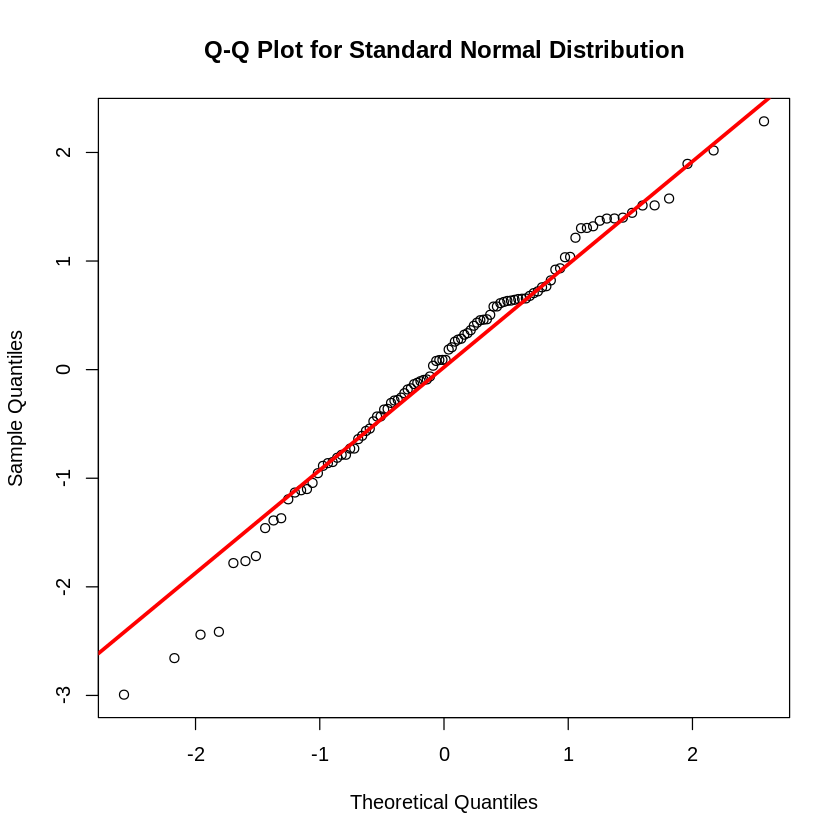

In [ ]:
# Create a Q-Q plot
qqnorm(random_values, main = "Q-Q Plot for Standard Normal Distribution")
qqline(random_values, col = "red", lwd = 3) # Add a reference line

###<a name='8'></a>Long-Tailed Distributions  

#####Long-tailed distributions are characterized by their **tails**, which extend farther than those of a normal distribution. These distributions often arise in datasets where extreme values are more common than expected under a normal distribution.  

##### Key Concepts  

1. **Tail**:  
   - The "tail" of a distribution refers to the parts of the probability density function that taper off as you move away from the center (mean).  
   - In long-tailed distributions, these tails decrease more slowly than in normal distributions, indicating a higher likelihood of extreme values.  

2. **Skewness**:  
   - Skewness measures the asymmetry of a distribution.  
   - **Right-skewed (positive skew)**: The right tail is longer, and extreme large values dominate.  
   - **Left-skewed (negative skew)**: The left tail is longer, and extreme small values dominate.  



###<a name='9'></a>t-Distribution (Student's t-distribution)

#####The **t-distribution**, often referred to as the **Student's t-distribution**, is a type of probability distribution that is symmetric and bell-shaped, much like the normal distribution, but with heavier tails. This distribution is particularly useful when dealing with small sample sizes and when the population standard deviation is unknown. The t-distribution is key for hypothesis testing and estimating confidence intervals in these scenarios.

##### Key Concepts:

1. **Heavier Tails**:
   The t-distribution has **heavier tails** compared to the normal distribution. This means it assigns more probability to extreme values, making it more robust for small sample sizes. The increased spread reflects the greater variability observed in small datasets.

2. **Degrees of Freedom (df)**:
   The t-distribution is characterized by **degrees of freedom (df)**, which are related to the sample size:
   $$ df = n - 1 $$
   where $n$ is the sample size. As the degrees of freedom increase, the t-distribution approaches the normal distribution.

3. **t-Statistic**:
   The **t-statistic** is a measure of how far a sample mean is from the population mean, expressed in terms of the standard error. It is calculated as:
   $$ t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$
   where:
   - $\bar{x}$ is the sample mean,
   - $\mu$ is the population mean,
   - $s$ is the sample standard deviation,
   - $n$ is the sample size.

4. **Use in Hypothesis Testing**:
   The t-distribution is commonly used in hypothesis testing, particularly for small sample sizes ($n$ < 30). It is applied in:
   - **t-tests**: To compare sample means (one-sample, two-sample, paired sample).
   - **Confidence intervals**: For estimating the population mean from a sample when the population standard deviation is unknown.

5. **t-Distribution vs Normal Distribution**:
   - For **large sample sizes**, the t-distribution approaches the normal distribution.
   - For **small sample sizes**, the t-distribution has wider tails and more probability in the tails, which accounts for the uncertainty in estimating the population mean from a small sample.



###<a name='10'></a>Binomial Distribution

#####The **binomial distribution** is a discrete probability distribution that describes the number of successes in a fixed number of independent trials, each with the same probability of success. It is commonly used in scenarios where the outcomes are binary (e.g., success/failure, yes/no, 1/0).

##### Key Characteristics

1. **Binary Outcomes**:
   - Each trial results in one of two outcomes: success or failure.

2. **Fixed Number of Trials**:
   - The number of trials ($n$) is predetermined and does not change.

3. **Independent Trials**:
   - The outcome of one trial does not affect the outcome of another.

4. **Constant Probability**:
   - The probability of success ($p$) is the same for all trials.

##### Probability Mass Function (PMF)

The probability of observing exactly $k$ successes in $n$ trials is given by:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

Where:
- $X$: Random variable representing the number of successes.
- $n$: Number of trials.
- $k$: Number of successes.
- $p$: Probability of success in a single trial.
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$: Binomial coefficient.

##### Mean and Variance

- **Mean**: $E(X) = n \cdot p$
- **Variance**: $\text{Var}(X) = n \cdot p \cdot (1-p)$

##### Example Use Case

A factory produces lightbulbs, and 90% of the bulbs pass quality control. If a batch contains 10 bulbs, the probability of exactly 8 passing quality control can be calculated using the binomial distribution:

$$
P(X = 8) = \binom{10}{8} (0.9)^8 (0.1)^2
$$


####Exercise 2.6

1. Define a **binomial distribution** with:
   - Number of trials ($n$) = 10
   - Probability of success ($p$) = 0.9
2. Calculate the probability of **exactly 8 successes**.
3. Display the result of the calculated probability.
4. Create a **bar plot** for the binomial distribution, with:
   - Adjusted y-axis scale ranging from 0 to 0.4.
   - Proper labels and title for the plot.


[1] 0.1937102


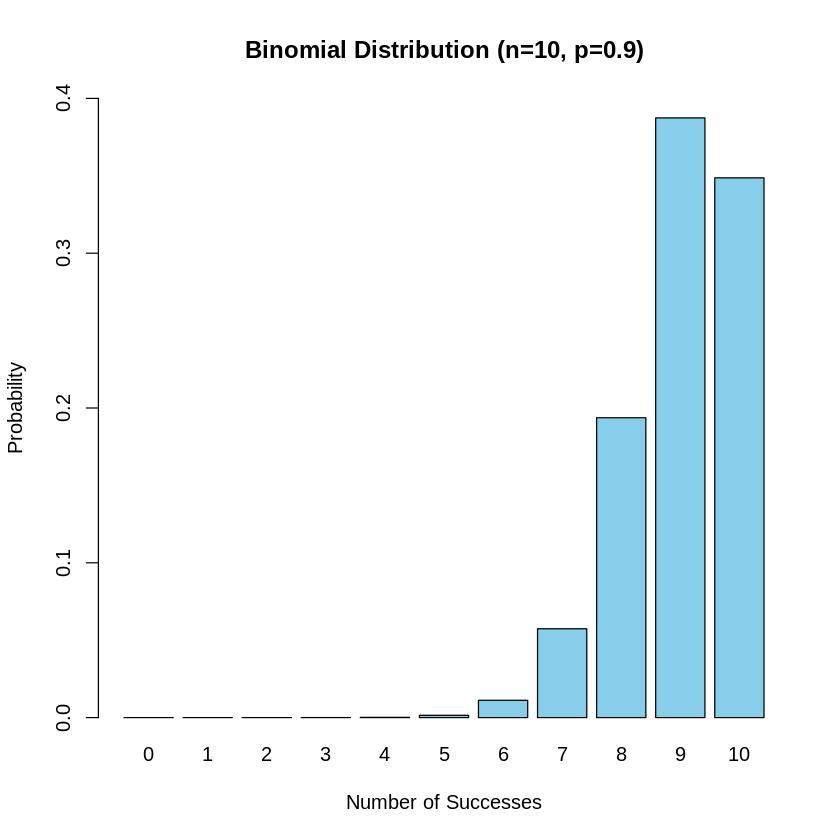

In [ ]:
# Parameters
n <- 10   # Number of trials
p <- 0.9  # Probability of success

# Calculate probability for exactly 8 successes
k <- 8
probability <- dbinom(k, size = n, prob = p)
print(probability)

# Plot the binomial distribution with adjusted y-axis
x <- 0:n
probabilities <- dbinom(x, size = n, prob = p)
barplot(probabilities, names.arg = x, main = "Binomial Distribution (n=10, p=0.9)",
        xlab = "Number of Successes", ylab = "Probability", col = "skyblue",
        ylim = c(0, 0.4))  # Set y-axis scale from 0 to 1


####Exercise 2.7


1. Define a **binomial distribution** with:
   - Number of trials ($n$) = 10
   - Probability of success ($p$) = 0.6
2. Calculate and display:
   - The probability of having **4 or fewer successes** ($P(X \leq 4)$).
   - The probability of having **more than 4 successes** ($P(X > 4)$).
3. Create a **step plot** showing the **cumulative probabilities** for the binomial distribution.

[1] 0.1662386
[1] 0.8337614


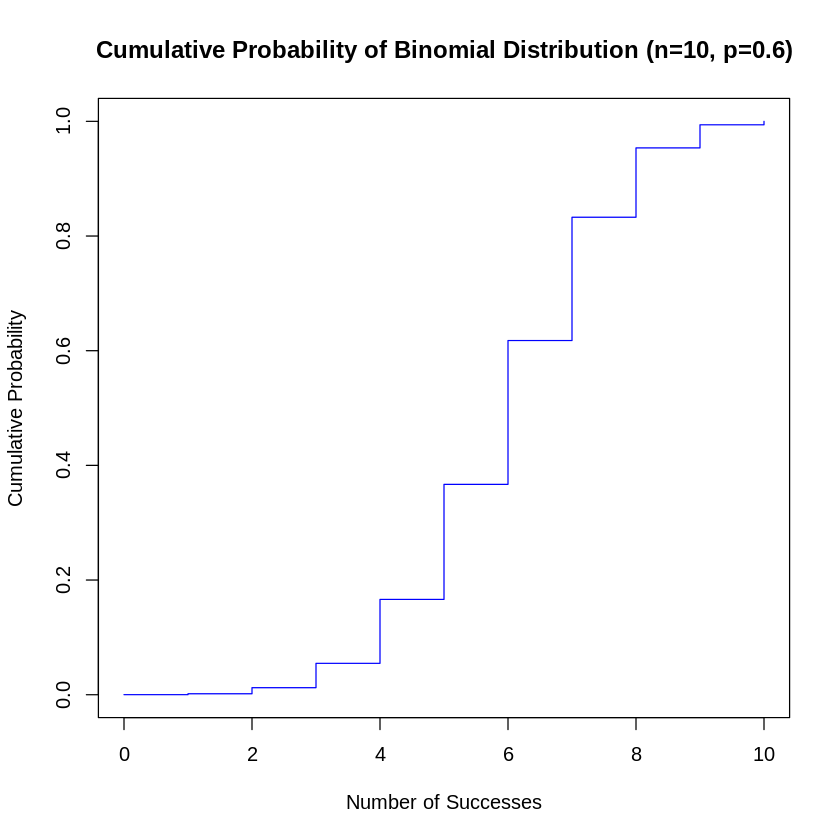

In [ ]:
# Parameters
n <- 10   # Number of trials
p <- 0.6  # Probability of success

# 1. Probability that number of successes is <= 4
k <- 4
probability_less_equal_4 <- pbinom(k, size = n, prob = p)
print(probability_less_equal_4)  # Output: 0.317

# 2. Probability that number of successes is > 4
probability_greater_4 <- pbinom(k, size = n, prob = p, lower.tail = FALSE)
print(probability_greater_4)  # Output: 0.683

# 3. Plot cumulative probability
x <- 0:n
cumulative_probabilities <- pbinom(x, size = n, prob = p)
plot(x, cumulative_probabilities, type = "s", col = "blue",
     main = "Cumulative Probability of Binomial Distribution (n=10, p=0.6)",
     xlab = "Number of Successes", ylab = "Cumulative Probability")


###<a name='11'></a>Chi-Square Distribution

#####The **Chi-Square Distribution** is a special case of the **Gamma Distribution**, widely used in statistical tests like **goodness-of-fit** and **test for independence**.

##### Key Characteristics

1. **Degrees of Freedom (df):** Defines the shape of the distribution. It typically represents the number of independent observations.
2. **Shape:**
   - For small df, the distribution is skewed right.
   - As df increases, the distribution becomes more symmetric and approaches a normal distribution.
3. **Skewness:** Decreases as df increases, becoming symmetric for large df.

##### Applications

- **Goodness-of-Fit Test:** Compares observed data to a theoretical distribution.
- **Test for Independence:** Determines if two categorical variables are independent.
- **Confidence Interval for Variance:** Calculates confidence intervals for variance in a normal population.

##### Probability Density Function (PDF)

The probability density function (PDF) of the Chi-Square distribution is:

$$ f(x, df) = \frac{x^{\frac{df}{2} - 1} e^{-\frac{x}{2}}}{2^{\frac{df}{2}} \Gamma(\frac{df}{2})} $$

where:
- $ x $ is the random variable,
- $ df $ is the degrees of freedom,
- $ \Gamma(\cdot) $ is the Gamma function.


###<a name='12'></a>F-Statistic

#####The F-statistic is used to compare variances in statistical hypothesis testing and ANOVA (Analysis of Variance). It helps determine if there are significant differences between group means.

#### Formula

$$
F = \frac{\text{Variance Between Groups}}{\text{Variance Within Groups}}
$$

#### Applications

1. **ANOVA**: Tests if the means of multiple groups are significantly different.
2. **Comparing Variances**: Assesses if two population variances are equal.
3. **Regression**: Tests the overall significance of a regression model.

#### F-Distribution

- The F-distribution is right-skewed and defined by two degrees of freedom:
  - **df1**: Variance between groups.
  - **df2**: Variance within groups.

#### Interpreting F-Statistic

- **Large F-value**: Indicates significant differences between group means.
- **Small F-value**: Suggests no significant differences.


###<a name='13'></a>Poisson Distribution

#####The Poisson distribution models the number of events occurring within a fixed interval of time, space, or another domain, assuming these events occur independently and at a constant average rate.

##### Key Characteristics

1. **Discrete Distribution**: Counts the number of events.
2. **Parameter ($\lambda$)**: Represents the average rate of events in the interval.
3. **Skewness**: Right-skewed for small $\lambda$, becomes symmetric as $\lambda$ increases.

##### Probability Mass Function (PMF)

#####The probability of observing $k$ events is given by:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

#####Where:
- $k$: Number of events ($k = 0, 1, 2, \dots$),
- $\lambda$: Average rate of events,
- $e$: Euler's number ($\approx 2.718$).

##### Properties

1. **Mean**: $E(X) = \lambda$
2. **Variance**: $\text{Var}(X) = \lambda$


####Exercise 2.8

#####Simulate 100 random samples from a Poisson distribution with:
#####Mean ($\lambda$) = 4.
#####Plot a histogram to visualize the distribution of the simulated values.

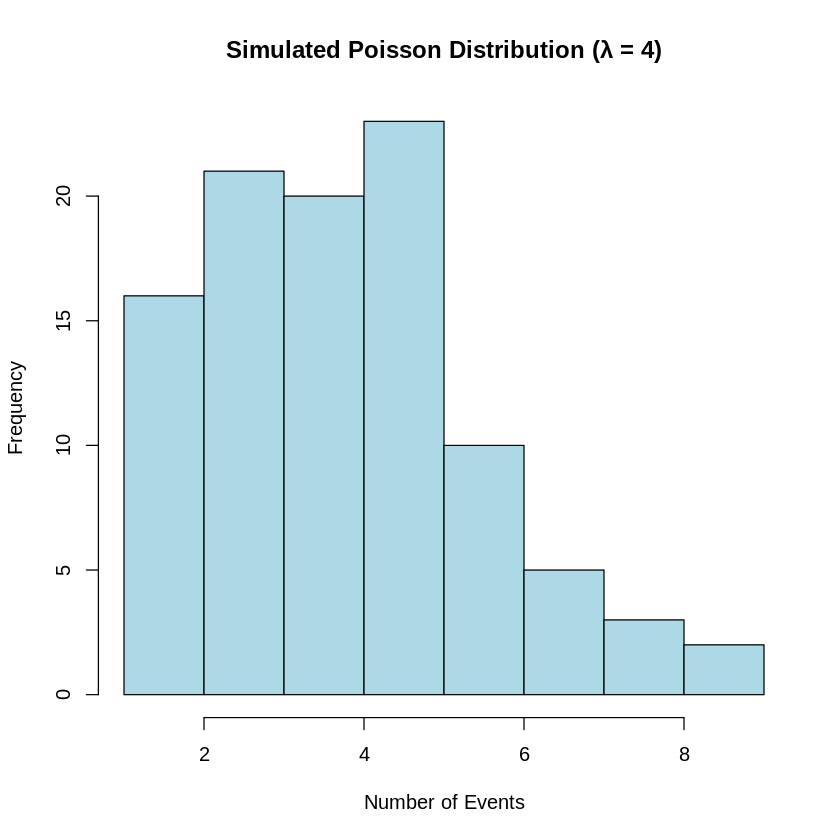

In [2]:
# Parameters
lambda <- 4  # Mean of the Poisson distribution
n <- 100     # Number of samples to generate

# Simulate random samples
poisson_samples <- rpois(n, lambda = lambda)

# Plot a histogram
hist(poisson_samples, breaks = 10, main = "Simulated Poisson Distribution (λ = 4)",
     xlab = "Number of Events", col = "lightblue", border = "black")


####Exercise 2.9
#####For a Poisson distribution with a mean ($\lambda$) of 4, calculate and display:
#####The probability of observing exactly 2 events ($P(X = 2)$).
#####The probability of observing exactly 6 events ($P(X = 6)$).

In [3]:
# Parameters
lambda <- 4  # Mean of the Poisson distribution

# Calculate probabilities
prob_2 <- dpois(2, lambda = lambda)  # Probability of exactly 2 events
prob_6 <- dpois(6, lambda = lambda)  # Probability of exactly 6 events

# Print results
cat("P(X = 2):", prob_2, "\n")  # Output: ~0.1465251
cat("P(X = 6):", prob_6, "\n")  # Output: ~0.1041956


P(X = 2): 0.1465251 
P(X = 6): 0.1041956 


###<a name='14'></a> Exponential Distribution

#####The **exponential distribution** is a continuous probability distribution that describes the time between events in a **Poisson process**, where events occur continuously and independently at a constant average rate. It is often used to model waiting times.



##### Key Properties of the Exponential Distribution

1. **Probability Density Function (PDF):**  
   The formula for the exponential distribution is:  
   $
   f(x; \lambda) =
   \begin{cases}
   \lambda e^{-\lambda x}, & x \geq 0 \\
   0, & x < 0
   \end{cases}
   $
   - $\lambda > 0$: rate parameter (average number of events per unit time).  
   - $x$: the variable (time or distance).

2. **Cumulative Distribution Function (CDF):**  
   $
   F(x; \lambda) = 1 - e^{-\lambda x}, \quad x \geq 0
   $

3. **Mean and Variance:**  
   - Mean ($\mu$): $\frac{1}{\lambda}$  
   - Variance ($\sigma^2$): $\frac{1}{\lambda^2}$

4. **Memoryless Property:**  
   The probability of waiting for another $t$ units of time does not depend on how much time has already passed. Formally:
   $
   P(X > s + t | X > s) = P(X > t)
   $


##### Applications
- **Queueing systems:** Time between arrivals of customers.
- **Reliability analysis:** Time to failure of systems.
- **Natural processes:** Time between radioactive decay events.


##### R Functions for Exponential Distribution
- `rexp(n, rate)`: Generate random numbers from the exponential distribution.
- `dexp(x, rate)`: Compute the probability density.
- `pexp(q, rate)`: Compute the cumulative probability.
- `qexp(p, rate)`: Compute the quantile for a given cumulative probability.



#### Exercise 2.10

1. **Define an Exponential Distribution:**
   - Set the rate parameter $\lambda = 2$ (average number of events per unit time).

2. **Generate a Sample:**
   - Generate 100 random values from the exponential distribution with parameter $\lambda$.

3. **Calculations:**
   - Compute and display the probability density function (PDF) value for $x = 1$.
   - Compute and display the cumulative distribution function (CDF) value for $x \leq 1$.

4. **Visualization:**
   - Create a plot of the PDF for the exponential distribution with parameter $\lambda = 2$ over the range $x \in [0, 3]$.

**Hints:**
- Use R functions `rexp()`, `dexp()`, and `pexp()` to perform the tasks.
- Set the random seed using `set.seed()` to ensure reproducibility.
- Use the `curve()` function in R to generate the plot.


[1] 0.2706706
[1] 0.8646647


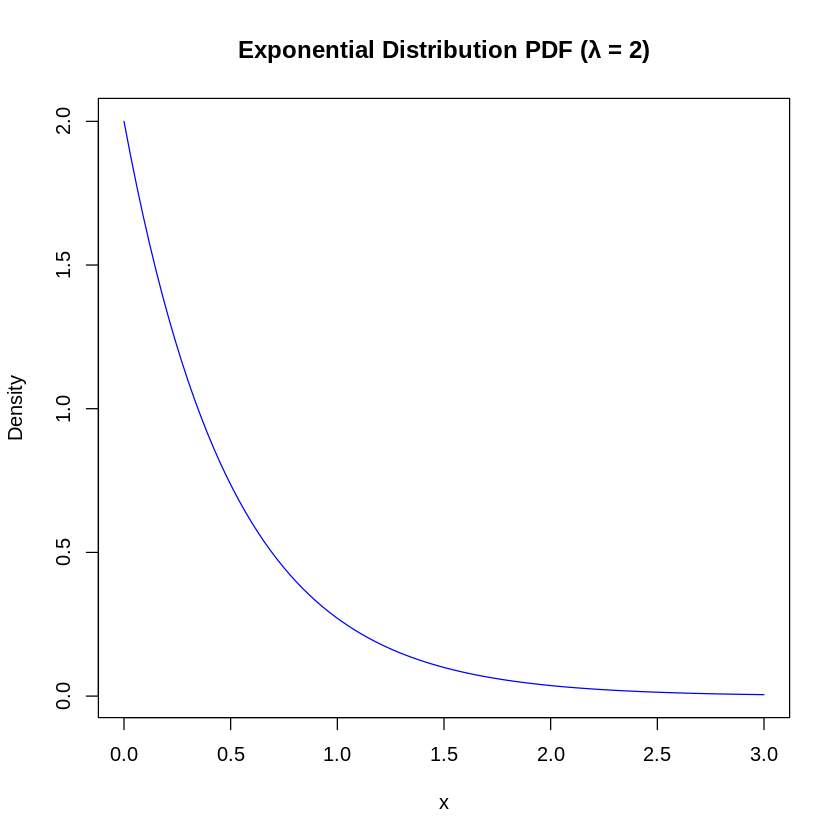

In [7]:
# Parameters
lambda <- 2  # Rate parameter

# Generate 100 random values from the exponential distribution
set.seed(42)
data <- rexp(100, rate = lambda)

# Calculate the probability density for x = 1
pdf_value <- dexp(1, rate = lambda)
print(pdf_value)

# Calculate cumulative probability for x <= 1
cdf_value <- pexp(1, rate = lambda)
print(cdf_value)

# Plot the PDF
curve(dexp(x, rate = lambda), from = 0, to = 3, col = "blue",
      main = "Exponential Distribution PDF (λ = 2)",
      xlab = "x", ylab = "Density")

###<a name='15'></a> Weibull Distribution

#####The Weibull distribution is a continuous probability distribution widely used in reliability analysis and survival studies. It is particularly useful for modeling the time until the first failure of a process or system.

**Probability Density Function (PDF):**
The PDF of the Weibull distribution is given by:

$$
f(x; \lambda, k) =
\begin{cases}
\frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k-1} e^{-(x/\lambda)^k}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

where:
- $k > 0$ is the shape parameter, which determines the distribution's shape.
- $\lambda > 0$ is the scale parameter, which stretches or compresses the distribution.

**Cumulative Distribution Function (CDF):**
The CDF of the Weibull distribution is:

$$
F(x; \lambda, k) = 1 - e^{-(x/\lambda)^k}, \quad x \geq 0
$$

**Properties:**
- **Shape Parameter ($k$):**
  - $k < 1$: Indicates a decreasing failure rate over time, often associated with "infant mortality" failures.
  - $k = 1$: Represents a constant failure rate, corresponding to the exponential distribution.
  - $k > 1$: Suggests an increasing failure rate over time, typical of "wear-out" failures.

- **Scale Parameter ($\lambda$):**
  - Scales the distribution; larger values of $\lambda$ result in a distribution stretched along the x-axis, indicating longer lifetimes.




####Excercise 2.11

1. **Define the Weibull Distribution:**
   - Set the **shape parameter** ($k$) to 1.5.
   - Set the **scale parameter** ($\lambda$) to 2.

2. **Generate Random Data:**
   - Create a sample of 1000 random values from the defined Weibull distribution.

3. **Calculate Probabilities:**
   - Compute the **probability density function (PDF)** value for $x = 1$.
   - Compute the **cumulative distribution function (CDF)** value for $x = 1$.

4. **Visualize the Distribution:**
   - Plot a histogram of the generated data.



[1] 0.3723917
[1] 0.2978115


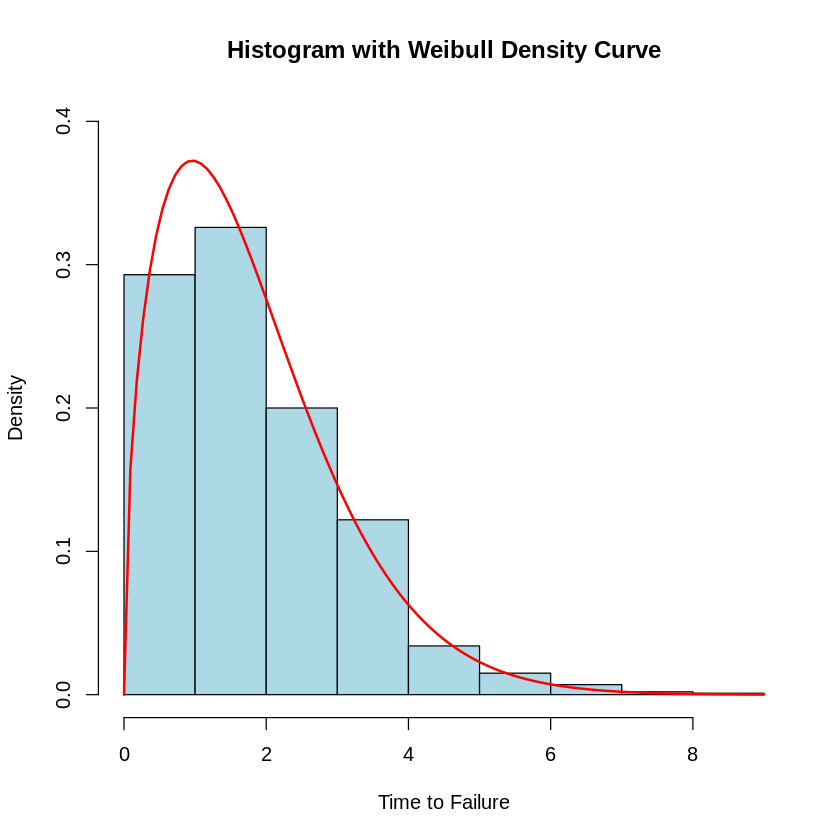

In [9]:
# Parameters
lambda <- 2  # Scale parameter
k <- 1.5     # Shape parameter

# Generate 1000 random values from the Weibull distribution
set.seed(42)
data <- rweibull(1000, shape = k, scale = lambda)

# Calculate the probability density for x = 1
pdf_value <- dweibull(1, shape = k, scale = lambda)
print(pdf_value)

# Calculate the cumulative probability for x <= 1
cdf_value <- pweibull(1, shape = k, scale = lambda)
print(cdf_value)

# Plot the histogram with the Weibull density curve
hist(data, probability = TRUE, col = "lightblue", main = "Histogram with Weibull Density Curve",
     xlab = "Time to Failure", ylab = "Density", ylim = c(0, 0.4))
curve(dweibull(x, shape = k, scale = lambda), add = TRUE, col = "red", lwd = 2)